In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py
from IPython.utils import io

In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
bdf_mass = load_dir(dirname='/data/new_trap/20200713/Bead1/Mass0713/', max_file=100)

19  files in folder
19  files loaded


In [14]:
bdf_mass1 = bdf_mass[4:9]

### Mass measurement

In [15]:
bb = bdf_mass1[0]
charges = 3
force = charges * 1.6e-19 * 20 / 8.6e-3 * 0.63  # in Newtons

# t_short = 1
# fsamp = 500
# freq = 10
# amp = force
# dt = 1. / fsamp
# nsamp = int(t_short / dt)
# time = np.arange(nsamp) * dt
# sig = amp * np.sin(2 * np.pi * freq * time)

In [18]:
2000/50

40.0

<IPython.core.display.Javascript object>


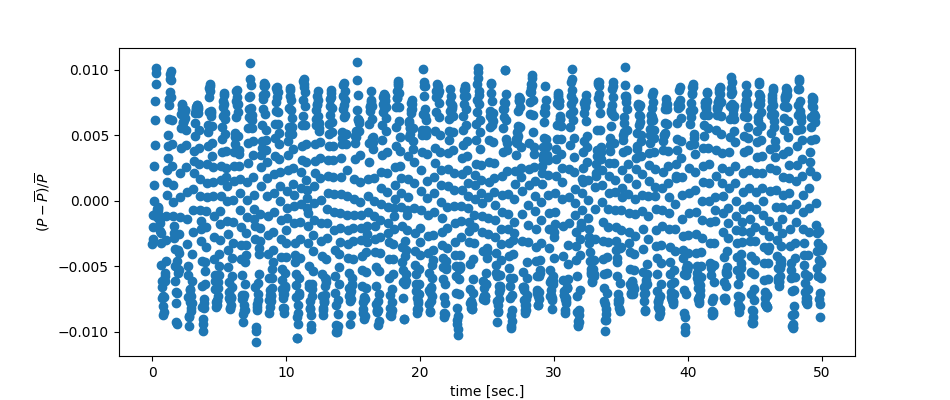

mass in pg:  6.707969005357167
power decrease [%] (peak to valley):  2.139568542576227
force:  7.032558139534882e-16


In [17]:
nroll = 13
ff = np.roll(np.mean(bb.Iz.reshape(2000,-1), axis=1), nroll)
_, ax = plt.subplots(figsize=(9.5,4))
ax.scatter(np.arange(2000)*1/40, (ff-np.mean(ff))/np.mean(ff))
ax.set(ylabel=r'$(P-\overline{P})/\overline{P}$', xlabel='time [sec.]')
print('mass in pg: ', 2*np.mean(ff)/(np.min(ff)-np.max(ff))*force/9.8*1e15) 
print('power decrease [%] (peak to valley): ', 100*(np.min(ff)-np.max(ff))/np.mean(ff))
print('force: ', force)

In [ ]:
bb = bdf_mass[0]

data = bb.Iz[10000:40000]
data = data/np.mean(data)
t = np.arange(len(data))*1/5000.

optimize_func = lambda x: x[0]*np.sin(2*np.pi*t*[1]+x[2]) - data
est_amp, est_freq, est_phase = leastsq(optimize_func, [0.1, 1, 3])[0]
print(est_amp, est_freq, est_phase)
print(-1/est_amp*force/9.8*1e15)

### Another method

In [27]:
from scipy.optimize import leastsq
## assuming 1Hz, 10V amplitude
def get_mass(bb, charges):
    ff = np.mean(bb.Iz.reshape(2000,-1), axis=1)
    force = charges * 1.6e-19 * 200 / 8.6e-3 * 0.63  # in Newtons
    masses = []
    for i in range(5,45):
        subset = ff[i*40:(i+1)*40]
        masses.append(2*np.mean(subset)/(np.min(subset)-np.max(subset))*force/9.8*1e15)
        ax.scatter(range(len(subset)), subset)
    return masses

def get_mass2(bb, charges):
    force = charges * 1.6e-19 * 20 / 8e-3 * 0.63  # in Newtons
    data = bb.Iz[10000:40000]
    data = data/np.mean(data)
    t = np.arange(len(data))*1/5000.

    optimize_func = lambda x: x[0]*np.sin(2*np.pi*t*[1]+x[2]) - data
    est_amp, est_freq, est_phase = leastsq(optimize_func, [0.1, 1, 3])[0]
    return -1/est_amp*force/9.8*1e15

In [28]:
charges = 3
mass_mean = [np.mean(get_mass(bb, charges=charges)[0]) for bb in bdf_mass]
mass_std =  [np.std(get_mass(bb, charges=charges)[0]) for bb in bdf_mass]

In [29]:
mass_mean

[308.82651204595084,
 295.9716223054545,
 590.5300685687888,
 239.84144548722185,
 86.05859862031724,
 78.86673902009493,
 81.66461496075577,
 83.1076354661147,
 83.10850610462228,
 401.083217229013,
 266.60352254843986,
 321.78756820892346,
 371.47820518844543,
 617.1920865359842,
 284.928460822646,
 177.9897503497866,
 189.790264006573,
 304.1295550285009,
 229.29972668291185]

<IPython.core.display.Javascript object>


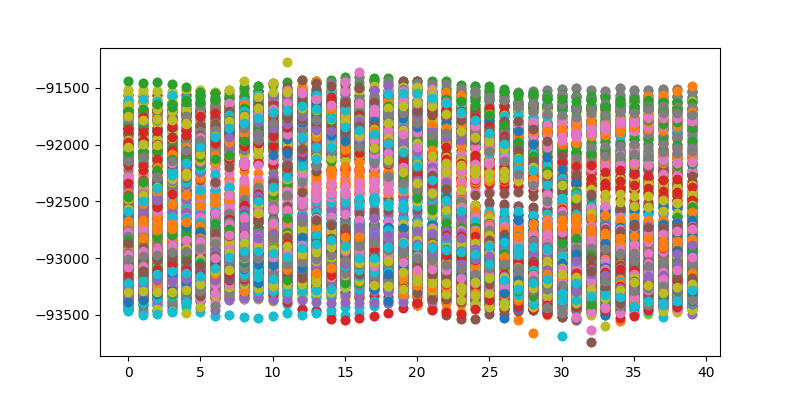

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [23]:
from matplotlib.ticker import MaxNLocator

_,ax = plt.subplots(figsize=(8,4))
ax.errorbar(range(5), mass_mean, yerr=mass_std/np.sqrt(1), fmt='o', label='50 sec., 1Hz measurement')
ax.plot(range(5), np.arange(5)*0+81, '--', label='Nominal value')
ax.legend()
ax.set(title='Mass - 5um bead', ylabel='Mass [pg]', xlabel='iteration')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))